## Project 1 - Invetigate a Dataset (The movie dataset)


### Table Of Contents

- Introduction
- Data Wrangling
- Exploratory Data Analysis
- Conclusions
- Resources


## 1.0 Introduction

### Dataset Description

The dataset contains information about 10,000 movies collected from ** The movie Database(TMDb) **, including user ratings and revenue.

- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
- There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.




## Question(s) for Analysis

After studying the datasets the following questions will be answered in the course of this analysis.

1. Which month produced the highest grossing movies in terms of revenue and popularity?

2. Top ten movies with the highest run time between year 2000 to 2015?

3. Which movie had the highest budget?



To start the analysis all important libraries were imported.


In [130]:
# import all libraries and packages needed for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

## 2.0 Data Wrangling

The second phase of my analysis will involve loading my dataset which is in a CSV format and data cleaning.

In [131]:
#create array for movie dataframe

df_movies = pd.read_csv('tmdb-movies.csv')

# view dataframe first five rows to check for success 

df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [132]:
# Check dataset to know the datatypes and entries.

df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data structure



In [133]:
# Check the dataset structure

df_movies.shape

(10866, 21)

### Check for duplicate entries

In [134]:
# Check for total number of duplicates in dataset

sum(df_movies.duplicated())

1

#### observation: 

#### 1 duplicate entry was found 

#### Confirm the duplicate entries

In [135]:
# check for the exact rows containing the duplicates

df_movies[df_movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### Observation:

id 42194 with movie title TEKKEN was found to be the duplicate entry in the dataset.

### Check for unique entries in the dataset

In [136]:
#Check for unique entries in the dataset

df_movies.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

#### Observations:

The original title column has 10571 unique entries aganist 10865 in the original dataset meaning that some movies title had duplicate records.

The director column had 5067 unique records as aganist the 10822 entries.



### Determine the number of entries with null values 

In [137]:
# Determine the number of null values in the dataset as this gives us an idea on whether to replace or drop them.

df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Keep original dataset for future reference

In [138]:
# Assign df_movies dataframe to another variable to keep my original dataset

mov_upd = df_movies

# check for success

mov_upd.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### Drop entries with duplicate values 

In [139]:
# Drop duplicate rows while keeping the first then check the updated info to know if the change was effected.

mov_upd.drop_duplicates(keep='first', inplace=True)

mov_upd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

### Drop columns with high null values 


In [140]:
# Drop some columns not needed in my anlaysis with high null values.

mov_upd.drop(['id', 'imdb_id','cast', 'homepage','director','tagline','keywords', 'overview','production_companies'], axis = 1, inplace = True, errors ='ignore')



In [141]:
#view dataframe to check for success

mov_upd.head(1)

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [20]:
# check if all entries are uniformed across rows
mov_upd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   runtime         10865 non-null  int64  
 5   genres          10842 non-null  object 
 6   release_date    10865 non-null  object 
 7   vote_count      10865 non-null  int64  
 8   vote_average    10865 non-null  float64
 9   release_year    10865 non-null  int64  
 10  budget_adj      10865 non-null  float64
 11  revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


In [142]:
#check to see if any null values still exist

mov_upd.isnull().sum()


popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [143]:
# Drop genre columnn as it is relevant for my analysis

mov_upd.drop(['genres'], axis=1, inplace = True , errors= 'ignore')

In [144]:
# Check if all entries are uniform

mov_upd. info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   runtime         10865 non-null  int64  
 5   release_date    10865 non-null  object 
 6   vote_count      10865 non-null  int64  
 7   vote_average    10865 non-null  float64
 8   release_year    10865 non-null  int64  
 9   budget_adj      10865 non-null  float64
 10  revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 1018.6+ KB


In [145]:
# check descriptive statistics to get more insight about dataset.

mov_upd.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### From the descriptive statistics information, 

1. The minimum revenue is 0  while the maximum is 2.7815060000 . it also shows that 50% of the movies generated zero renvenue. This poses limitation to my analysis as i am unable to ascertain if the zero values where as a result of data entry errors or the correct value.


2. Highest popularity 32.985763 with 75% having less than 0.713857.


3. Highest runtime extended to 900 with 0 minimum and 50% of movies having above 99.000000.


4. Release year ranges from 1960 to 2015.


### Variables needed for my analysis


- Question 1 columns needed (Month(extracted from release date), popularity and revenue)


- Question 2 columns neeed (original_title, release_year and runtime)



### Examine variables

To ensure the dataset is clean before analysis and get rid of unwanted entries all needed variables will be examined for zero values.

In [146]:
# Check number of entries for revenue with zero value

mov_upd.query('revenue==0').count()

popularity        6016
budget            6016
revenue           6016
original_title    6016
runtime           6016
release_date      6016
vote_count        6016
vote_average      6016
release_year      6016
budget_adj        6016
revenue_adj       6016
dtype: int64

In [148]:
#confirm entries with zero value for revenue 

mov_upd.query('revenue==0')

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,2.932340,30000000,0,Wild Card,92,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,2.331636,20000000,0,Survivor,96,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,2.165433,0,0,Mythica: The Darkspore,108,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,2.141506,0,0,Me and Earl and the Dying Girl,105,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,1.876037,0,0,Mythica: The Necromancer,0,12/19/15,11,5.4,2015,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,95,6/15/66,11,7.4,1966,0.000000e+00,0.0
10862,0.065543,0,0,Grand Prix,176,12/21/66,20,5.7,1966,0.000000e+00,0.0
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,1966,0.000000e+00,0.0
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,1966,0.000000e+00,0.0


In [149]:
# Check runtime column for zero value

mov_upd.query('runtime==0').count()

popularity        31
budget            31
revenue           31
original_title    31
runtime           31
release_date      31
vote_count        31
vote_average      31
release_year      31
budget_adj        31
revenue_adj       31
dtype: int64

In [150]:
mov_upd.query('runtime==0')

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,1.876037,0,0,Mythica: The Necromancer,0,12/19/15,11,5.4,2015,0.000000e+00,0.0
334,0.357654,0,0,Ronaldo,0,11/9/15,80,6.5,2015,0.000000e+00,0.0
410,0.097514,0,0,Anarchy Parlor,0,1/1/15,15,5.6,2015,0.000000e+00,0.0
445,0.218528,0,0,The Exorcism of Molly Hartley,0,10/9/15,52,5.0,2015,0.000000e+00,0.0
486,0.176744,0,0,If There Be Thorns,0,4/5/15,11,5.4,2015,0.000000e+00,0.0
595,0.028725,0,0,Deep Dark,0,1/1/15,11,4.6,2015,0.000000e+00,0.0
616,0.026797,0,0,The Outfield,0,11/10/15,20,6.6,2015,0.000000e+00,0.0
1241,0.135376,0,0,Dance-Off,0,1/1/14,18,5.7,2014,0.000000e+00,0.0
1289,0.037459,3250000,0,Treehouse,0,10/20/14,16,3.4,2014,2.993546e+06,0.0
1293,0.036904,0,0,Tim Maia,0,10/30/14,14,6.0,2014,0.000000e+00,0.0


The revenue columns contained about 6016 zero values which means that about 50% of movies had 0 revenue based on the dataset.

The runtime column also contained 31 zero value entries.

For the purpose of this analysis all revenue entries with zero values will be dropped which will also cut across the runtime column as all zero runtime value had no revenue.

In [151]:
#create another array for the updated movie dataframe to drop all zero entries in the revenue column

rev_1 = mov_upd[(mov_upd.revenue !=0)]

rev_1.query('revenue==0 or runtime==0').count()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [152]:
# Check for shape of cleaned dataframe

rev_1.shape


(4849, 11)

##  Exploratory Analysis

In [153]:
# check descriptive statistics of cleaned dataset

rev_1.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4849.000000,4.849000e+03,4.849000e+03,4849.000000,4849.000000,4849.000000,4849.000000,4.849000e+03,4.849000e+03
mean,1.045202,2.956961e+07,8.923886e+07,107.968035,436.283151,6.149000,2000.919777,3.516208e+07,1.151009e+08
std,1.356752,4.051761e+07,1.620801e+08,21.113779,806.485754,0.798707,11.569650,4.376117e+07,1.988557e+08
min,0.001117,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,0.387740,1.700000e+06,7.732325e+06,95.000000,46.000000,5.600000,1994.000000,2.329409e+06,1.046585e+07
50%,0.680581,1.500000e+07,3.185308e+07,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.395666e+07
75%,1.210502,4.000000e+07,9.996575e+07,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.316482e+08
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


### Variance distribution

To better understand the dataset distribution of the dataset a histogram and scatter plot (to examine relationship and correlation) will be plotted.

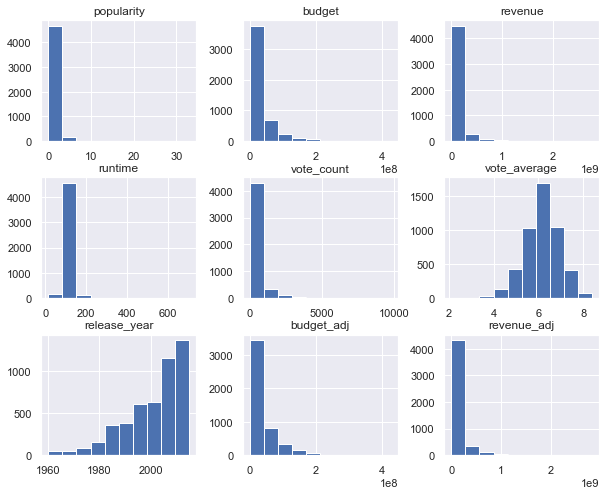

In [154]:
# histogram

rev_1.hist(figsize=(10,8));


##### The following observations where made from the histogram after cleaning dataset

1. Most movies had a budget within 0 to 0.4

2. Most movies has popularity between 0 to 0.5

3. Most movies had runtime of about 100-150

4. More movies were produced in the 20's

### Examine the relationship between variables in dataset

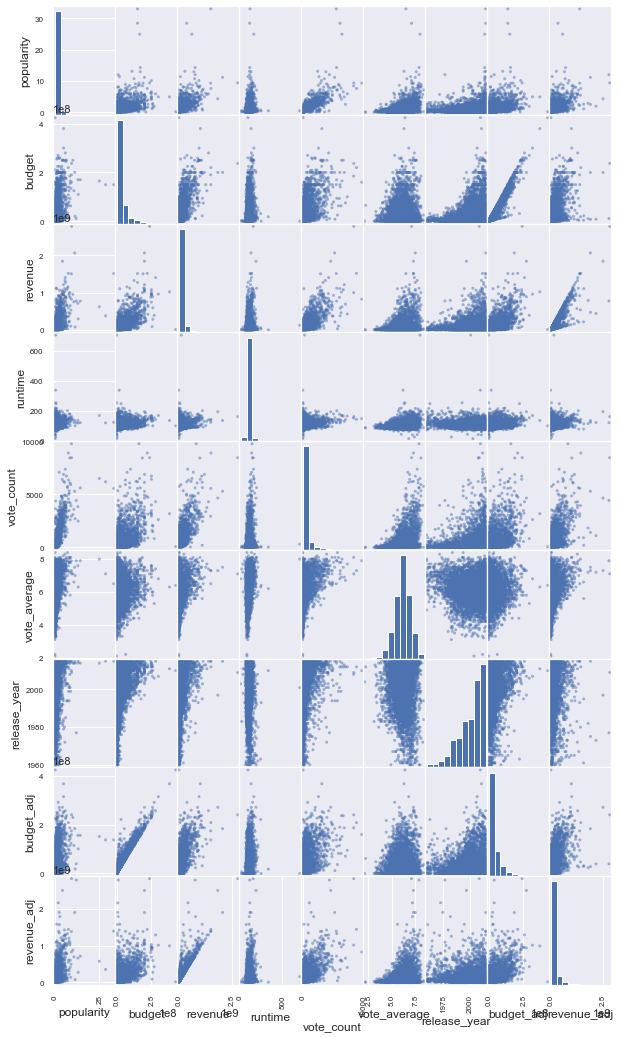

In [155]:
# check relationship using scatter plot.

pd.plotting.scatter_matrix(rev_1,figsize = (10,18));

#### Observations 

1. Popularity and revenue has a positive correlation.
2. Popularity and runtime has a positive correlation but relatively low.
3. No correlation between runtime and vote count.
4. Positive correlation between popularity and vote count.
5. No correlation between release year and runtime.
6. Popularity and vote_count had a positive correlation.
7. popularity and runtime had no correlation.



### Extraction of Month column

The month column is to be extracted from the release_date column for the purpose of my analysis. To achieve this extraction the release_data datatype is changed to datetime from object.

In [156]:
# change release_ year to datatime

rev_1['release_date']= pd.to_datetime(rev_1['release_date'])

#Check for success

rev_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      4849 non-null   float64       
 1   budget          4849 non-null   int64         
 2   revenue         4849 non-null   int64         
 3   original_title  4849 non-null   object        
 4   runtime         4849 non-null   int64         
 5   release_date    4849 non-null   datetime64[ns]
 6   vote_count      4849 non-null   int64         
 7   vote_average    4849 non-null   float64       
 8   release_year    4849 non-null   int64         
 9   budget_adj      4849 non-null   float64       
 10  revenue_adj     4849 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(1)
memory usage: 454.6+ KB


C:\Users\ezeok\AppData\Local\Temp\ipykernel_28424\1090907897.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev_1['release_date']= pd.to_datetime(rev_1['release_date'])


In [157]:
#Extract month from release date 

rev_1['month']= pd.to_datetime(rev_1['release_date'], format = '%m').dt.month_name().str.slice(stop=3)

# Check top rows for success

rev_1.head()

C:\Users\ezeok\AppData\Local\Temp\ipykernel_28424\1662143469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev_1['month']= pd.to_datetime(rev_1['release_date'], format = '%m').dt.month_name().str.slice(stop=3)


,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,32.985763,150000000,1513528810,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Jun
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,May
2,13.112507,110000000,295238201,Insurgent,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Mar
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Dec
4,9.335014,190000000,1506249360,Furious 7,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Apr


## Question 1

#### Extract dataset needed to analyze question 1.

In [158]:
# seperate dataset to be use to respond to question 1 

ques_1 = rev_1.groupby('month')[['month','revenue','popularity']]

#  Check for success

ques_1.head()

,month,revenue,popularity
0,Jun,1513528810,32.985763
1,May,378436354,28.419936
2,Mar,295238201,13.112507
3,Dec,2068178225,11.173104
4,Apr,1506249360,9.335014
5,Dec,532950503,9.110700
6,Jun,440603537,8.654359
7,Sep,595380321,7.667400
8,Jun,1156730962,7.404165
9,Jun,853708609,6.326804


###  Get mean values for extracted dataset

In [159]:
#calculate mean 

mean_q1 = ques_1.mean()

# Check for success

mean_q1.head(12)


,revenue,popularity
month,,
Apr,7.650220e+07,0.888685
Aug,5.911315e+07,0.884480
Dec,1.197775e+08,1.156937
Feb,6.128107e+07,0.876507
Jan,4.294198e+07,0.826323
Jul,1.181829e+08,1.200495
Jun,1.503917e+08,1.302764
Mar,8.462250e+07,1.053615
May,1.363645e+08,1.246543


In [161]:
# Order months from Jan - Dec

months =['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
num_months = dict(zip(months,range(len(months))))
num_months

{'Jan': 0,
 'Feb': 1,
 'Mar': 2,
 'Apr': 3,
 'May': 4,
 'Jun': 5,
 'Jul': 6,
 'Aug': 7,
 'Sep': 8,
 'Oct': 9,
 'Nov': 10,
 'Dec': 11}

#### Assign Index number  to Months column

The months columns is in the *'mmm'* format therefore an index number will be assigned for sorting and plot creation.

In [162]:
# Assign index number to months on dataset

mean_q1['month_id'] = mean_q1.index
mean_q1['month_id'] = mean_q1['month_id']. map(num_months)

#Check for success

mean_q1

,revenue,popularity,month_id
month,,,
Apr,7.650220e+07,0.888685,3
Aug,5.911315e+07,0.884480,7
Dec,1.197775e+08,1.156937,11
Feb,6.128107e+07,0.876507,1
Jan,4.294198e+07,0.826323,0
Jul,1.181829e+08,1.200495,6
Jun,1.503917e+08,1.302764,5
Mar,8.462250e+07,1.053615,2
May,1.363645e+08,1.246543,4


In [163]:
# sort dtaframe by months using the month_id

mean_q1.sort_values('month_id', inplace = True)

# confirm changes

mean_q1

,revenue,popularity,month_id
month,,,
Jan,4.294198e+07,0.826323,0
Feb,6.128107e+07,0.876507,1
Mar,8.462250e+07,1.053615,2
Apr,7.650220e+07,0.888685,3
May,1.363645e+08,1.246543,4
Jun,1.503917e+08,1.302764,5
Jul,1.181829e+08,1.200495,6
Aug,5.911315e+07,0.884480,7
Sep,4.225202e+07,0.826104,8


### observation

1. The month June generated the highest revenue and also had the highest popularity.

2. The month of September generated the lowest revenue and also the lowest popularity.



### Plot bar chart for popularity and revenue

####  1. Revenue generated by months

In [164]:
# array per interval

bar_index = np.arange(len(mean_q1['month_id']))
width = 0.4
bar_index + width

array([ 0.4,  1.4,  2.4,  3.4,  4.4,  5.4,  6.4,  7.4,  8.4,  9.4, 10.4,
       11.4])

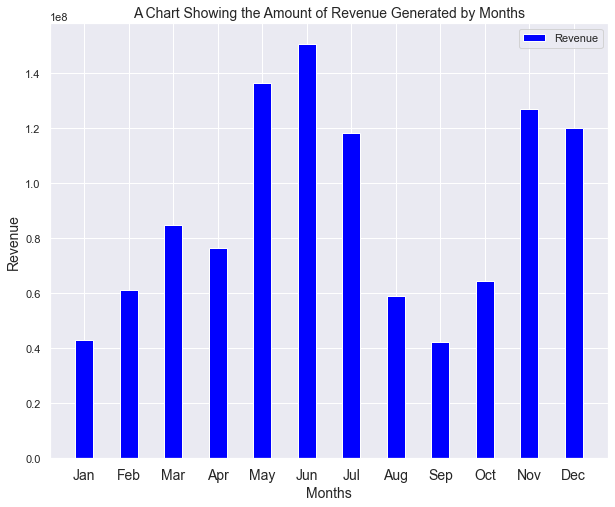

In [165]:
# fig size

plt.figure(figsize=(10,8))

# bar plot

bar_1 = plt.bar(bar_index, mean_q1['revenue'], width, color ='blue', label = 'Revenue')


plt.xlabel('Months', fontsize = 14)
plt.ylabel('Revenue', fontsize =14 )
plt.title ('A Chart Showing the Amount of Revenue Generated by Months', fontsize = 14)
plt.xticks(bar_index, mean_q1.index, fontsize = 14)             
              
plt.legend()

### Observations

The bar chart shows June to be the month with the highest generated revenue within the year **1960 to 2015** with the lowest being september.

###  2. Popularity by months

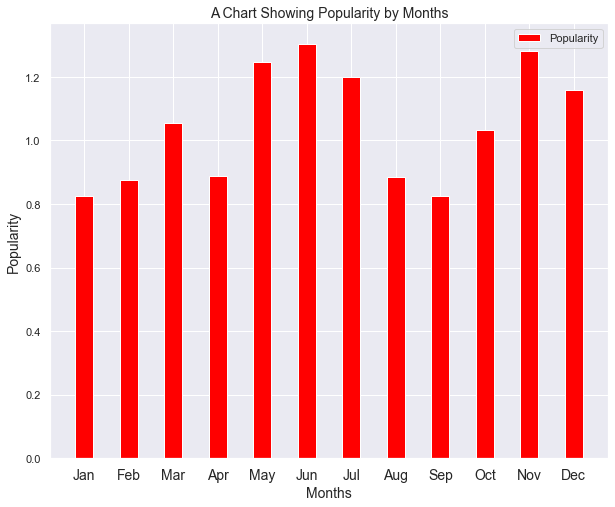

In [166]:
# popularity bar chart

#fig size
plt.figure(figsize=(10,8))

#bar_plot

bar_1 = plt.bar(bar_index, mean_q1['popularity'], width, color ='red', label = 'Popularity')


plt.xlabel('Months', fontsize = 14)
plt.ylabel('Popularity', fontsize=14)
plt.title ('A Chart Showing Popularity by Months', fontsize=14)
plt.xticks(bar_index, mean_q1.index, fontsize =14)             
              
plt.legend()

plt.show()

### Observation

#### The month with the highest popularity is June while the lowest is September.

### 3. Scatter plot to show relationship between Revenue and Popularity

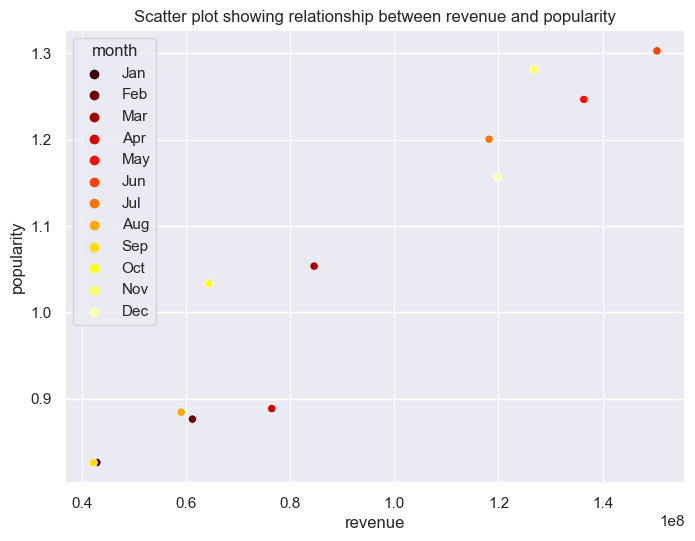

In [167]:
#fig size

plt.figure (figsize=(8,6), dpi =100)

# plot scatter plot
sns.scatterplot(x ='revenue', y = 'popularity',data = mean_q1,hue= 'month', palette ='hot').set( title = 'Scatter plot showing relationship between revenue and popularity');

## Question 2


### Top ten movies with the highest run time between year 2000 to 2015.


To start the anlaysis the dataset needed to answer the question is filtered to get the timeline specified.

In [168]:
# filter dataset 

year_filter = rev_1.query('release_year >= 2000')

# confirm changes

year_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3034 entries, 0 to 8883
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      3034 non-null   float64       
 1   budget          3034 non-null   int64         
 2   revenue         3034 non-null   int64         
 3   original_title  3034 non-null   object        
 4   runtime         3034 non-null   int64         
 5   release_date    3034 non-null   datetime64[ns]
 6   vote_count      3034 non-null   int64         
 7   vote_average    3034 non-null   float64       
 8   release_year    3034 non-null   int64         
 9   budget_adj      3034 non-null   float64       
 10  revenue_adj     3034 non-null   float64       
 11  month           3034 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(5), object(2)
memory usage: 308.1+ KB


### Extract Dataset

In [169]:
# filter dataset

ques_2 = year_filter.groupby ('release_year')[[ 'original_title', 'release_year','runtime']].head()



In [170]:
# sort dataset 

top_10 = ques_2.sort_values('runtime', ascending = False). head(10)

# Check for success

top_10


,original_title,release_year,runtime
4949,The Lord of the Rings: The Return of the King,2003,201
3911,The Lord of the Rings: The Two Towers,2002,179
2633,The Lord of the Rings: The Fellowship of the Ring,2001,178
7387,Pirates of the Caribbean: At World's End,2007,169
629,Interstellar,2014,169
4363,The Dark Knight Rises,2012,165
4364,Django Unchained,2012,165
1386,Avatar,2009,162
3912,Harry Potter and the Chamber of Secrets,2002,161
6190,Harry Potter and the Goblet of Fire,2005,157


In [171]:
# change index of dataset

top_10.set_index('original_title')


,release_year,runtime
original_title,,
The Lord of the Rings: The Return of the King,2003,201
The Lord of the Rings: The Two Towers,2002,179
The Lord of the Rings: The Fellowship of the Ring,2001,178
Pirates of the Caribbean: At World's End,2007,169
Interstellar,2014,169
The Dark Knight Rises,2012,165
Django Unchained,2012,165
Avatar,2009,162
Harry Potter and the Chamber of Secrets,2002,161


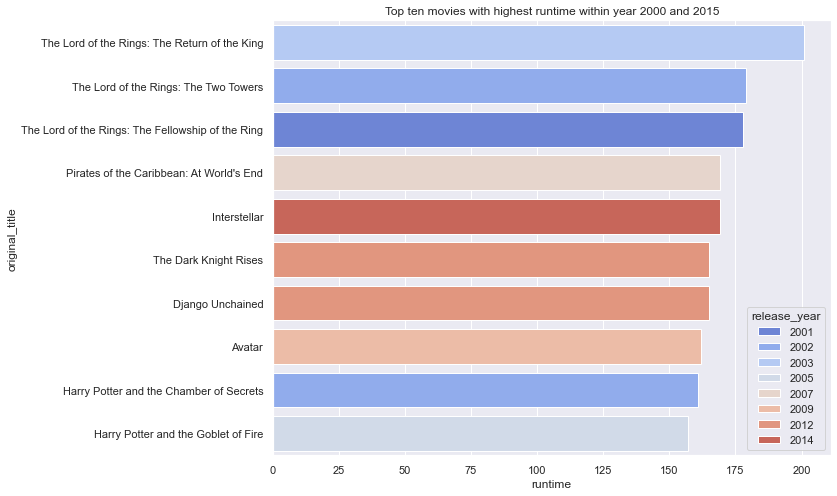

In [172]:
# bar plot using seaborn

fig =plt.gcf()

# set fig size

fig.set_size_inches(10,8)

sns.barplot(x ='runtime', y ='original_title', data = top_10, hue ='release_year', dodge = False, palette = 'coolwarm').set(title = 'Top ten movies with highest runtime within year 2000 and 2015')

plt.show()

#### Observation:

The Lord of the Rings movies (The return of the King, The two towers and fellowship of the ring) toped highest run time chart in 2001, 2002 and 2003 respectively with return of the king having the highest (201).

Two movies Django unchanted and Dark Knight Rises from 2012 were ranked among the top ten movies unlike other years with individual movies.

## Question 3

### Which movie had the highest budget?

In [174]:
# check dataset

rev_1.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,32.985763,150000000,1513528810,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Jun
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,May
2,13.112507,110000000,295238201,Insurgent,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Mar
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Dec
4,9.335014,190000000,1506249360,Furious 7,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Apr


In [176]:
# use function idxmax to find the movie with the highest budget 

def highest_entry (x):
    
    # use the function idxmax to find movie with highest budget

    high_index = rev_1[x].idxmax()


    high = pd.DataFrame(rev_1.loc[high_index,:])
    
# print movie with the highest budget

    print("The Movie with the highest" +" " + x + ":", rev_1['original_title'][high_index])
    
    
    return pd.concat ([high], axis =1)

#call the highest_entry function

highest_entry('budget')

The Movie with the highest budget: The Warrior's Way


,2244
popularity,0.25054
budget,425000000
revenue,11087569
original_title,The Warrior's Way
runtime,100
release_date,2010-12-02 00:00:00
vote_count,74
vote_average,6.4
release_year,2010
budget_adj,425000000.0


#### Code insight was gotten from [Kaggle](https://www.kaggle.com/code/deepak525/investigate-tmdb-movie-dataset/notebook)

#### Movie with the highest budget is _The Warrior's Way_ with a budget of _425000000_ 

In [129]:
# sort and assign dataset to new variable

budget_10 = rev_1.sort_values('budget', ascending = False). head(10)

# Check for success

budget_10.head()


,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
2244,0.250540,425000000,11087569,The Warrior's Way,100,2010-12-02,74,6.4,2010,4.250000e+08,1.108757e+07,Dec
3375,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,136,2011-05-11,3180,6.3,2011,3.683713e+08,9.904175e+08,May
7387,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,169,2007-05-19,2626,6.8,2007,3.155006e+08,1.010654e+09,May
14,5.944927,280000000,1405035767,Avengers: Age of Ultron,141,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09,Apr
6570,1.957331,270000000,391081192,Superman Returns,154,2006-06-28,834,5.3,2006,2.920507e+08,4.230205e+08,Jun


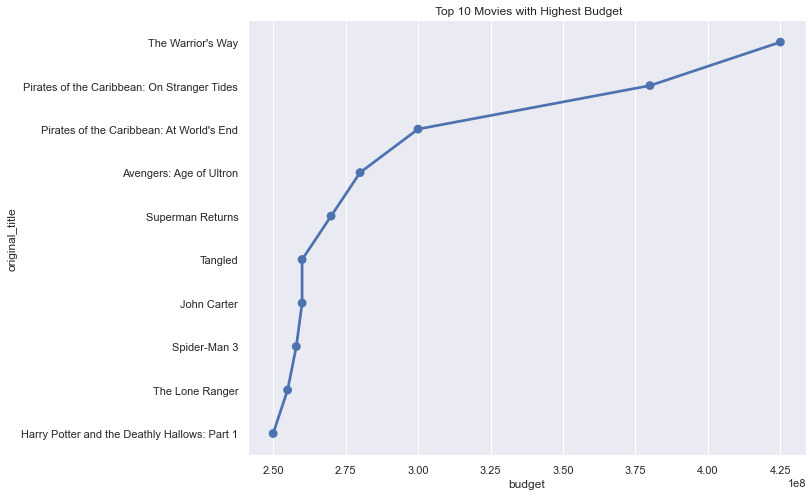

In [177]:
#line plot using seaborn

sns.set_theme(style = 'darkgrid')

fig =plt.gcf()

# set fig size

fig.set_size_inches(10,8)

#plot line plot

ax =sns.pointplot(x = 'budget', y= 'original_title',data  = budget_10).set (title = " Top 10 Movies with Highest Budget")


# 4.0 Conclusion 

The movie dataset was interesting to analyze and the following conclusions were derived.



### Question 1

1. The month of June generated the highest revenue of 1.503917e+08 while september generated the lowest 4.225202e+07	
2. The month of June also had the highest popularity 1.302764 with september as the lowest 0.826104  .
3. There's a relationship and positive correlation between popularity and revenue.

### Question 2

1. The Lord of the ring movies topped the chart as the top 3 movies with the highest runtime with the return of the king having a runtime of 201 which was highest receorded between the period of 2000 and 2015.

2. Year 2012 produced two movies with the high runtime in the top ten category.

### Question 3

1. The movie with the highest budget is The Warrior's Way with a budgeted amount of **425000000**.














## Limitations

The datasets had several limitations

1. The presence of many zero value in the dataset as I had to drop them from my anaylsis.

2. Some colums where multi parted and posed challenges during the analysis.



## Resources

[Panda Documentation](https://pandas.pydata.org/docs/reference/frame.html)

[Stack Overflow](https://stackoverflow.com/questions)

[Matplotlib documentation](https://matplotlib.org/stable/index.html)

[Markdown](https://www.markdownguide.org/basic-syntax)

[Matplotlib](https://matplotlib.org/stable/index.html)

[Statology](https://www.statology.org/python-guides/)

[Seaborn](https://seaborn.pydata.org/)

